In [1]:
from compare_semi_supervised_clustering import *


In [2]:
    x_train, y_train, x_test, y_test = load_data()
    percentages = [0.02, 0.05, 0.1, 0.2, 0.5]
    rounds = 5

    methods = {
        "SemiSupervisedGMM": SemiSupervisedGMM,
        "LabelPropagation": LabelPropagation,
        "SVC": SVC,
        "CopKMean": CopKMean,
    }

    methods_accs = []
    for Method in tqdm(methods.values(), desc="methods"):
        accs = []  # Temporarily store accuracies for the current method
        for percentage in tqdm(percentages, desc=">> percentages"):
            # Prepare labeled and unlabeled data
            labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(
                x_train, y_train, percentage=percentage)
            X = np.concatenate((labeled_data, unlabeled_data), axis=0)

            accs_round = []
            for _ in tqdm(range(rounds), desc="rounds"):
                model = fit_method(Method, X, labeled_data, labeled_labels, unlabeled_data, unlabeled_labels)
                cluster_assignments = model.predict(X)
                accs_round.append(clustering_accuracy(unlabeled_labels, cluster_assignments[len(labeled_labels):]))
            accs.append(accs_round)
        methods_accs.append(accs)


>> percentages:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:00<00:03,  1.03it/s]

rounds:  40%|████      | 2/5 [00:01<00:02,  1.03it/s]

rounds:  60%|██████    | 3/5 [00:02<00:01,  1.05it/s]

rounds:  80%|████████  | 4/5 [00:03<00:00,  1.03it/s]

rounds: 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

>> percentages:  20%|██        | 1/5 [00:04<00:19,  4.94s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

rounds:  40%|████      | 2/5 [00:02<00:03,  1.22s/it]

rounds:  60%|██████    | 3/5 [00:03<00:02,  1.20s/it]

rounds:  80%|████████  | 4/5 [00:04<00:01,  1.21s/it]

rounds: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]

>> percentages:  40%|████      | 2/5 [00:10<00:15,  5.25s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:01<00:06,  1.63s/it]

rounds:  40%|████      | 2/5 [00:03<00:04,  1.63s/it]

rounds:  60%|█████

rounds:  20%|██        | 1/5 [00:02<00:08,  2.07s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  40%|████      | 2/5 [00:04<00:06,  2.07s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  60%|██████    | 3/5 [00:06<00:04,  2.07s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  80%|████████  | 4/5 [00:08<00:02,  2.06s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide


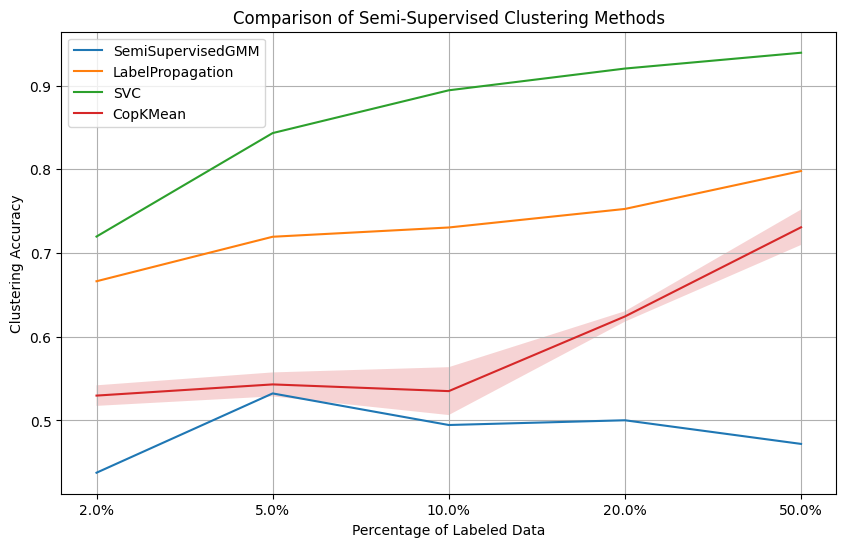

In [3]:
plot_multi_method_accs(methods_accs, percentages, methods.keys())

In [4]:
    x_train, y_train, x_test, y_test = load_data("cifar10")
    percentages = [0.02, 0.05, 0.1, 0.2, 0.5]
    rounds = 5

    methods = {
        "SemiSupervisedGMM": SemiSupervisedGMM,
        "LabelPropagation": LabelPropagation,
        "SVC": SVC,
        "CopKMean": CopKMean,
    }

    methods_accs = []
    for Method in tqdm(methods.values(), desc="methods"):
        accs = []  # Temporarily store accuracies for the current method
        for percentage in tqdm(percentages, desc=">> percentages"):
            # Prepare labeled and unlabeled data
            labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(
                x_train, y_train, percentage=percentage)
            X = np.concatenate((labeled_data, unlabeled_data), axis=0)

            accs_round = []
            for _ in tqdm(range(rounds), desc="rounds"):
                model = fit_method(Method, X, labeled_data, labeled_labels, unlabeled_data, unlabeled_labels)
                cluster_assignments = model.predict(X)
                accs_round.append(clustering_accuracy(unlabeled_labels, cluster_assignments[len(labeled_labels):]))
            accs.append(accs_round)
        methods_accs.append(accs)


>> percentages:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:11<00:47, 11.79s/it]

rounds:  40%|████      | 2/5 [00:26<00:38, 12.73s/it]

rounds:  60%|██████    | 3/5 [00:39<00:25, 12.62s/it]

rounds:  80%|████████  | 4/5 [00:50<00:12, 12.39s/it]

rounds: 100%|██████████| 5/5 [01:02<00:00, 12.48s/it]

>> percentages:  20%|██        | 1/5 [01:02<04:09, 62.48s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:12<00:49, 12.35s/it]

rounds:  40%|████      | 2/5 [00:30<00:42, 14.08s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


rounds:  60%|██████    | 3/5 [00:54<00:33, 16.98s/it]

rounds:  80%|████████  | 4/5 [01:09<00:16, 16.59s/it]/home/congyu/anaconda3/envs/congyuAI/lib/

rounds:  40%|████      | 2/5 [00:07<00:10,  3.62s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  60%|██████    | 3/5 [00:10<00:07,  3.51s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  80%|████████  | 4/5 [00:13<00:03,  3.46s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds: 100%|██████████| 5/5 [00:16<00:00,  3.39s/it]

>> percentages:  80%|████████  | 4/5 [01:11<00:17, 17.78s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-package

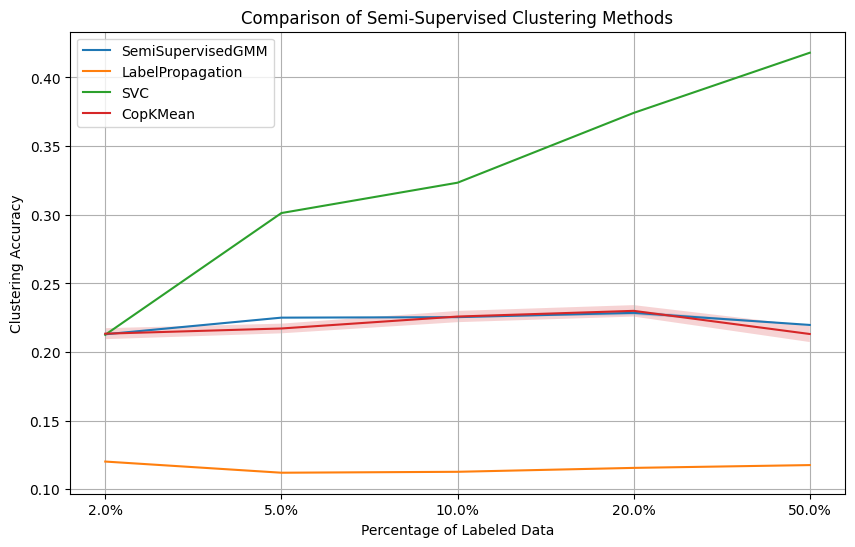

In [5]:
plot_multi_method_accs(methods_accs, percentages, methods.keys())